In [2]:
## Import Packages
import numpy as np
import _pickle as pk
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import os 

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
mpl.rcParams['hatch.linewidth'] = 1
%matplotlib inline

In [35]:
Source = '/Volumes/eSSD0/Papers/GMD_CanESM_p1/Data/'
mods = ['CanESM2','CanESM5_p2']
exps = ['amip','amip-p4K','amip-future4K']

lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

landmask_source = '/Volumes/eSSD0/Papers/GMD_CanESM_p2/Analysis/Control/'
CanESM5 = pk.load(open(landmask_source+'results/CanESM5_CCF_picon.pi','rb'))
landmask = np.isnan(CanESM5['TADV'][0,:,:])
landvalid = np.isfinite(CanESM5['TADV'][0,:,:])
landmask_ext = np.tile(landmask[None,:,:],(150,1,1))

EIS = {}
lowcld = {}
for m in range(2):
    EIS[mods[m]] = {}
    lowcld[mods[m]] = {}
    for e in range(3):
        EIS[mods[m]][exps[e]] = np.nanmean(pk.load(open(Source+mods[m]+'/CFMIP/Tier_1/EIS_'+mods[m]+'_'+exps[e]+'_climo.pi','rb')),axis=0)

        if exps[e] == 'amip':
            pass
        else:
            lowcld[mods[m]][exps[e]] = np.nanmean(pk.load(open(Source+mods[m]+'/CFMIP/Tier_1/'+mods[m]+'_CFMIP_TrCLsw_FB_SRdecomp_Grid.pi','rb'))['Low_unobscured'][exps[e]],axis=0)

In [38]:
lowcld['CanESM2'].keys()

dict_keys(['amip-p4K', 'amip-future4K'])

In [61]:
cloud_delta = {}
cloud_delta_plot = {}

cloud_mask = {}
cloud_mask_plot = {}
for runs in lowcld['CanESM2'].keys():
    cloud_delta[runs] = lowcld['CanESM5_p2'][runs]-lowcld['CanESM2'][runs]
    cloud_delta[runs][landmask] = np.nan
    cloud_delta_plot[runs] = np.concatenate((cloud_delta[runs][:,64:],cloud_delta[runs][:,:64]),axis=1)
    cloud_delta_plot[runs],lon_cyc = add_cyclic_point(cloud_delta_plot[runs],lon)

    cloud_mask[runs] = cloud_delta[runs]<0.15
    cloud_mask[runs][landmask] = np.nan
    cloud_mask_plot[runs] = np.concatenate((cloud_mask[runs][:,64:],cloud_mask[runs][:,:64]),axis=1)
    cloud_mask_plot[runs],lon_cyc = add_cyclic_point(cloud_mask_plot[runs],lon)

In [62]:
EIS_resp_p4K = {}
EIS_resp_f4K = {}
EIS_amip = {}
for models in EIS.keys():
    for exps in EIS[models].keys():
        EIS[models][exps][landmask] = np.nan

    EIS_resp_p4K[models] = np.ma.masked_invalid(EIS[models]['amip-p4K']-EIS[models]['amip'])
    EIS_resp_f4K[models] = np.ma.masked_invalid(EIS[models]['amip-future4K']-EIS[models]['amip'])
    EIS_amip[models] = np.ma.masked_invalid(EIS[models]['amip'])

    EIS_amip[models] = np.concatenate((EIS_amip[models][:,64:],EIS_amip[models][:,0:64]),axis=1)
    EIS_amip[models],lon_cyc = add_cyclic_point(EIS_amip[models],lon)

    EIS_resp_p4K[models] = np.concatenate((EIS_resp_p4K[models][:,64:],EIS_resp_p4K[models][:,0:64]),axis=1)
    EIS_resp_p4K[models],lon_cyc = add_cyclic_point(EIS_resp_p4K[models],lon)

    EIS_resp_f4K[models] = np.concatenate((EIS_resp_f4K[models][:,64:],EIS_resp_f4K[models][:,0:64]),axis=1)
    EIS_resp_f4K[models],lon_cyc = add_cyclic_point(EIS_resp_f4K[models],lon)

In [63]:
delta_amip = EIS_amip['CanESM5_p2']-EIS_amip['CanESM2']
delta_amip = np.ma.masked_invalid(delta_amip)

delta_resp_p4K = EIS_resp_p4K['CanESM5_p2']-EIS_resp_p4K['CanESM2']
delta_resp_p4K = np.ma.masked_invalid(delta_resp_p4K)

delta_resp_f4K = EIS_resp_f4K['CanESM5_p2']-EIS_resp_f4K['CanESM2']
delta_resp_f4K = np.ma.masked_invalid(delta_resp_f4K)

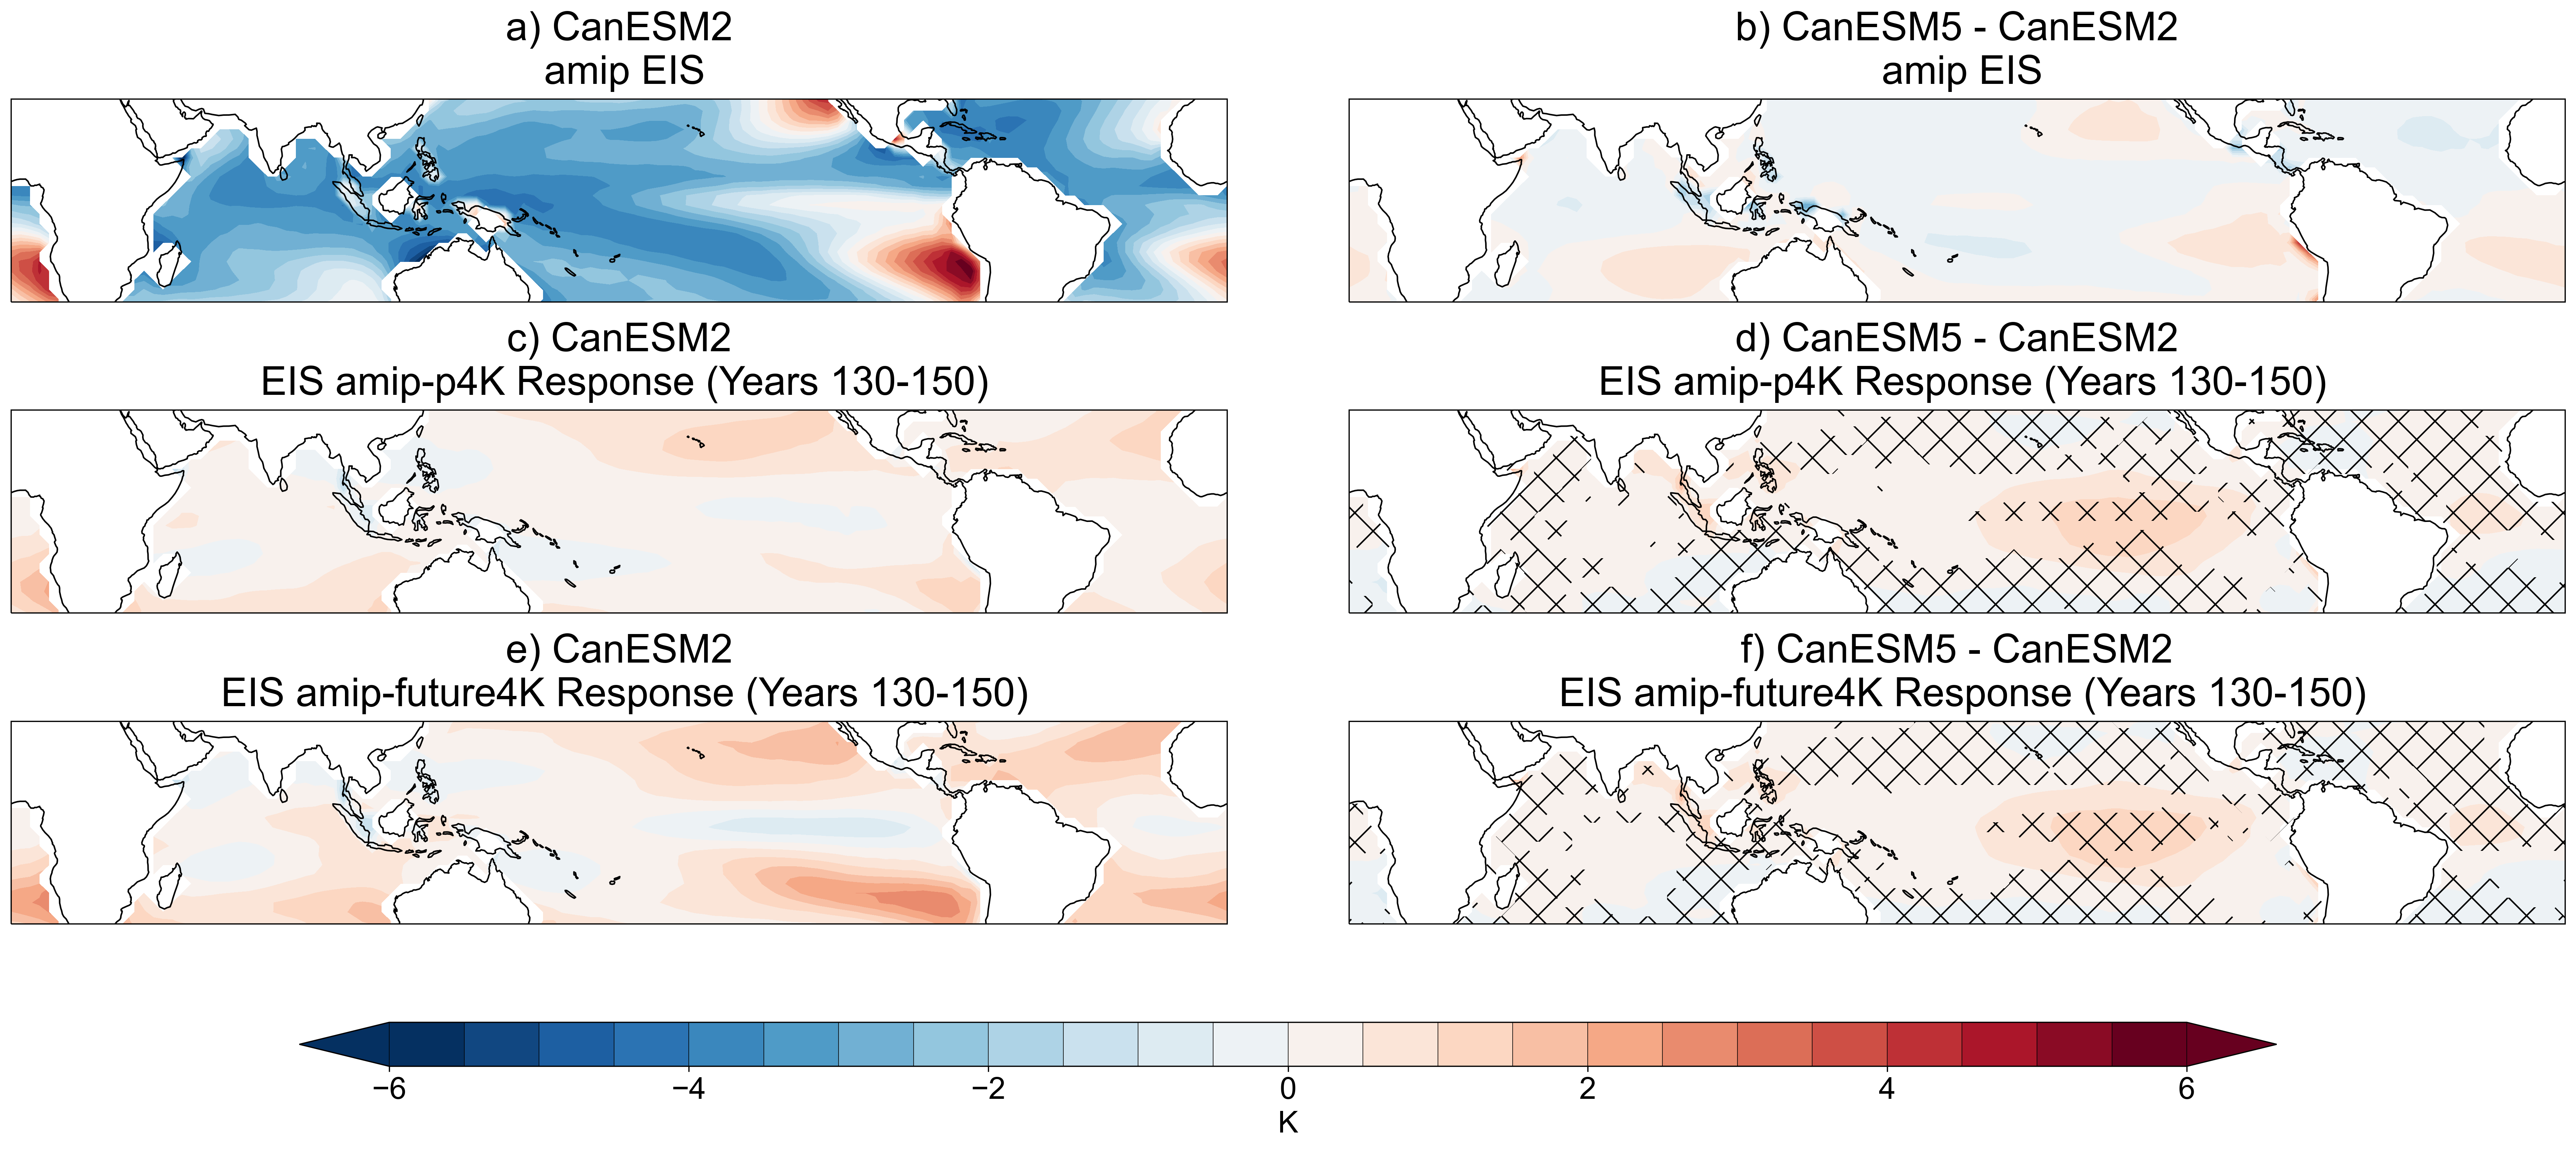

In [65]:
bounds = np.arange(-6,6.1,0.5)
bounds_ticks = np.arange(-6,6.1,2)
cmap = plt.cm.RdBu_r
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(30,20),dpi=300)
ax = plt.subplot(3,2,1,projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([-180, 30, -30, 30], crs=ccrs.PlateCarree())
ax.set_title('a) CanESM2\n amip EIS',fontsize=26,pad=10)
im = ax.contourf(lon_cyc,lat,EIS_amip['CanESM2'],bounds,cmap=cmap,norm=norm,extend='both')
ax.coastlines()

ax1 = plt.subplot(3,2,2,projection=ccrs.PlateCarree(central_longitude=180))
ax1.set_extent([-180, 30, -30, 30], crs=ccrs.PlateCarree())
ax1.set_title('b) CanESM5 - CanESM2\n amip EIS',fontsize=26,pad=10)
im1 = ax1.contourf(lon_cyc,lat,delta_amip,bounds,cmap=cmap,norm=norm,extend='both')
ax1.coastlines()

ax2 = plt.subplot(3,2,3,projection=ccrs.PlateCarree(central_longitude=180))
ax2.set_extent([-180, 30, -30, 30], crs=ccrs.PlateCarree())
ax2.set_title('c) CanESM2\n EIS amip-p4K Response (Years 130-150)',fontsize=26,pad=10)
im2 = ax2.contourf(lon_cyc,lat,EIS_resp_p4K['CanESM2'],bounds,cmap=cmap,norm=norm,extend='both')
ax2.coastlines()

ax3 = plt.subplot(3,2,4,projection=ccrs.PlateCarree(central_longitude=180))
ax3.set_extent([-180, 30, -30, 30], crs=ccrs.PlateCarree())
ax3.set_title('d) CanESM5 - CanESM2\n EIS amip-p4K Response (Years 130-150)',fontsize=26,pad=10)
im3 = ax3.contourf(lon_cyc,lat,delta_resp_p4K,bounds,cmap=cmap,norm=norm,extend='both')
im3_h = ax3.contourf(lon_cyc,lat,cloud_mask_plot['amip-p4K'],1,colors='none',hatches=['x',''])
ax3.coastlines()

ax4 = plt.subplot(3,2,5,projection=ccrs.PlateCarree(central_longitude=180))
ax4.set_extent([-180, 30, -30, 30], crs=ccrs.PlateCarree())
ax4.set_title('e) CanESM2\n EIS amip-future4K Response (Years 130-150)',fontsize=26,pad=10)
im4 = ax4.contourf(lon_cyc,lat,EIS_resp_f4K['CanESM2'],bounds,cmap=cmap,norm=norm,extend='both')
ax4.coastlines()

ax5 = plt.subplot(3,2,6,projection=ccrs.PlateCarree(central_longitude=180))
ax5.set_extent([-180, 30, -30, 30], crs=ccrs.PlateCarree())
ax5.set_title('f) CanESM5 - CanESM2\n EIS amip-future4K Response (Years 130-150)',fontsize=26,pad=10)
im5 = ax5.contourf(lon_cyc,lat,delta_resp_p4K,bounds,cmap=cmap,norm=norm,extend='both')
im5_h = ax5.contourf(lon_cyc,lat,cloud_mask_plot['amip-future4K'],1,colors='none',hatches=['x',''])
ax5.coastlines()

plt.subplots_adjust(hspace=-0.7,wspace=0.1)

cax = fig.add_axes([0.2125, 0.25, 0.6, 0.02])
cbar = plt.colorbar(im,cax=cax,ticks=bounds_ticks,drawedges=True,orientation='horizontal')
cbar.set_label('K',fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.savefig('EIS_CFMIP_Response.png',bbox_inches='tight')